In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv', index_col=0, parse_dates=True)

In [6]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [7]:
len(df)

325

In [8]:
df = df.dropna()

In [9]:
len(df)

325

<AxesSubplot:xlabel='DATE'>

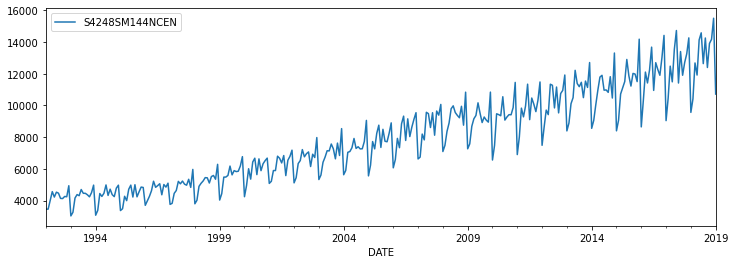

In [11]:
df.plot(figsize=(12,4))

In [13]:
y = df["S4248SM144NCEN"].values.astype(float)

In [15]:
test_size = 12

In [16]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [18]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [21]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [22]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [23]:
train_norm

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848],
       [-0.77211727],
       [-0.79399949],
       [-0.74886742],
       [-0.66783486],
       [-0.99247799],
       [-0.94084965],
       [-0.75861185],
       [-0.78972562],
       [-0.75570562],
       [-0.66595436],
       [-0.77895547],
       [-0.71142833],
       [-0.77040773],
       [-0.79194803],
       [-0.70031627],
       [-0.66834772],
       [-0.94204633],
       [-0.92255748],
       [-0.78835798],
       [-0.83537054],
       [-0.71211215],
       [-0.66783486],
       [-0.7962219 ],
       [-0.66339003],
       [-0.79417044],
       [-0

In [28]:
window_size = 12

len(y) - test_size - window_size

301

In [25]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [27]:
train_norm.shape

torch.Size([313])

In [29]:
window_size = 12

In [30]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out

In [31]:
train_data = input_data(train_norm, window_size)

In [32]:
len(train_data)

301

In [33]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

In [34]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

In [35]:
torch.manual_seed(101)

model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [36]:
model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)